In [3]:
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

hfss_dir = Path.home()/'work'
gain_pattern_file = 'wg_array.csv'

gain_point = np.dtype([('phi',float),('theta',float),('dB',float)])
temp = np.zeros(4, dtype=gain_point)

def parse(file):
    with open(file, 'r') as infile:
        reader = csv.reader(infile,)
        lines = []
        for i, line in enumerate(reader):
            temp = np.zeros(1, dtype=gain_point)
            if i>0:
                temp['phi'],temp['theta'],temp['dB'] = float(line[0]),float(line[1]),float(line[2])
                lines.append(temp)
                
    return np.array(lines)
                    


In [4]:
gain_pattern = parse(hfss_dir/gain_pattern_file)

In [5]:
gain_pattern['phi'].reshape((91, 181))

array([[-180., -178., -176., ...,  176.,  178.,  180.],
       [-180., -178., -176., ...,  176.,  178.,  180.],
       [-180., -178., -176., ...,  176.,  178.,  180.],
       ...,
       [-180., -178., -176., ...,  176.,  178.,  180.],
       [-180., -178., -176., ...,  176.,  178.,  180.],
       [-180., -178., -176., ...,  176.,  178.,  180.]])

In [6]:
gain_pattern['theta'].reshape((91, 181))

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       [  4.,   4.,   4., ...,   4.,   4.,   4.],
       ...,
       [176., 176., 176., ..., 176., 176., 176.],
       [178., 178., 178., ..., 178., 178., 178.],
       [180., 180., 180., ..., 180., 180., 180.]])

In [7]:
gain_pattern['dB'].reshape((91, 181))

array([[13.9011 , 13.9011 , 13.9011 , ..., 13.9011 , 13.9011 , 13.9011 ],
       [13.8907 , 13.8905 , 13.89   , ..., 13.89   , 13.8905 , 13.8907 ],
       [13.8585 , 13.8578 , 13.8557 , ..., 13.8557 , 13.8578 , 13.8585 ],
       ...,
       [ 5.21056,  5.20882,  5.20574, ...,  5.21005,  5.21097,  5.21056],
       [ 5.27445,  5.27377,  5.27276, ...,  5.27482,  5.2748 ,  5.27445],
       [ 5.30052,  5.30052,  5.30052, ...,  5.30052,  5.30052,  5.30052]])

In [8]:
np.min(gain_pattern['dB'])

-28.3618

In [9]:
thetas = np.radians(gain_pattern['theta'].reshape((91, 181)))
phis = np.radians(gain_pattern['phi'].reshape((91, 181)))
shifted_dBs = gain_pattern['dB'].reshape((91, 181))+28.4


In [10]:
z = shifted_dBs * np.cos(thetas)
x = shifted_dBs * np.sin(thetas) * np.cos(phis)
y = shifted_dBs * np.sin(thetas) * np.sin(phis)


max_dB = np.max(shifted_dBs)
rel_dBs = shifted_dBs / max_dB



In [144]:
idx_1 = np.where((gain_pattern['theta']==90) * (gain_pattern['phi']==0))
idx_2 = np.where((gain_pattern['theta']==90) * (gain_pattern['phi']==90))
idx_3 = np.where((gain_pattern['theta']==90) * (gain_pattern['phi']==180))
idx_4 = np.where((gain_pattern['theta']==90) * (gain_pattern['phi']==-180))
idx_5 = np.where((gain_pattern['theta']==0) * (gain_pattern['phi']==-180))
idx_6 = np.where((gain_pattern['theta']==180) * (gain_pattern['phi']==-180))

db1 = gain_pattern['dB'][idx_1][0] + 28.4
db2 = gain_pattern['dB'][idx_2][0] + 28.4
db3 = gain_pattern['dB'][idx_3][0] + 28.4
db4 = gain_pattern['dB'][idx_4][0] + 28.4
db5 = gain_pattern['dB'][idx_5][0] + 28.4
db6 = gain_pattern['dB'][idx_6][0] + 28.4

In [145]:
db2

18.77041

In [11]:
#sns.set_theme(context='paper', style='whitegrid', font_scale=1.6)

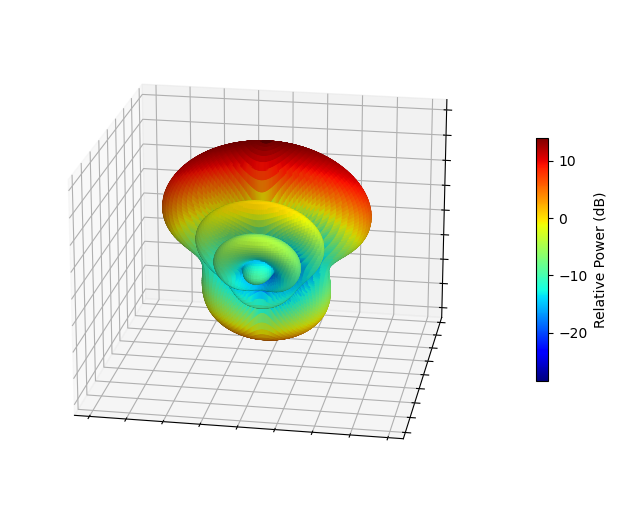

In [216]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
cmap = plt.cm.jet(rel_dBs)

#ax.view_init(elev=15,azim=5, roll=0)

#ax.plot([0.0, 1.2*max_dB],[0,0],[0,0], lw=1, color='k', ls=':')
#ax.plot([0,0],[0.*max_dB, 0.9*max_dB],[0,0], lw=1, color='k',ls=':')
#ax.plot([0,0],[0,0],[0*max_dB, 1.4*max_dB], lw=1, color='k',ls=':')

surf = ax.plot_surface(
    x,y,z,
    cstride=1,
    rstride=1,
    facecolors=cmap,
    antialiased=True,
    shade=True,
    lightsource=mpl.colors.LightSource(
        azdeg=135,
        altdeg=-45,
        hsv_min_val=0.,
        hsv_max_val=1,
        hsv_min_sat=1,
        hsv_max_sat=0,
    ),
    zorder=3
)




#ax.plot([0,0],[0,0],[0, 1.4*max_dB], lw=1, color='k',ls='--')

ax.set_xlim(-1.*max_dB, 1.*max_dB)
ax.set_ylim(-1.*max_dB, 1.*max_dB)
ax.set_zlim(-1.*max_dB, 1.*max_dB)
#ax.set_xlabel('x')
#ax.set_ylabel('y')
#ax.set_zlabel('z')


ax.view_init(elev=20,azim=100, roll=0)
#ax.scatter([0],[db1],[0], marker='.',)
#ax.plot([db2,0.75*max_dB],[0,0], zs=0,zdir='y', lw=1, color='k', ls='--', zorder=3)
#ax.plot([-db3,-0.75*max_dB],[0,0], zs=0,zdir='y', lw=1, color='k', ls='--', zorder=1)
#ax.plot([-db4,-0.75*max_dB],[0,0], zs=0,zdir='x', lw=1, color='k', ls='--', zorder=5)




#ax.plot([0,0],[-1.2*max_dB,1.2*max_dB], zs=0,zdir='z', lw=1, color='k', ls='--')
#ax.plot([0,0],[-1.2*max_dB,1.2*max_dB], zs=0,zdir='y', lw=1, color='k', ls='--')

#for tic in ax.xaxis.get_major_ticks():
#    tic.tick1line.set_visible(False)
#    tic.tick2line.set_visible(False)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])


fig.colorbar(
   plt.cm.ScalarMappable(
       norm=mpl.colors.Normalize(
           vmin=np.min(shifted_dBs)-28.4,
            vmax=np.max(shifted_dBs)-28.4),
       cmap='jet',
   ),
    shrink=.45,
    fraction=0.03,
    pad=0.05,
    ax=ax,
    label='Relative Power (dB)'
    
)

#plt.tight_layout()
plt.savefig(Path.home()/'group'/'project'/'plots'/'230419_radiation_pattern_example_view3', dpi=150)